# Изучение закономерностей, определяющих успешность игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Данные:**
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файла с данными и изучение общей информации

In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

plt.rcParams.update({'axes.grid': True, 'grid.alpha': .3})

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\D\\Project\\datasets\\games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [8]:
def percent_isna(column):
    return round(column.sum()/column.count() * 100, 2)

In [9]:
data.isna().agg(['sum', percent_isna])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
sum,2.00,0.0,269.00,2.00,0.0,0.0,0.0,0.0,8578.00,6701.00,6766.00
percent_isna,0.01,0.0,1.61,0.01,0.0,0.0,0.0,0.0,51.32,40.09,40.48


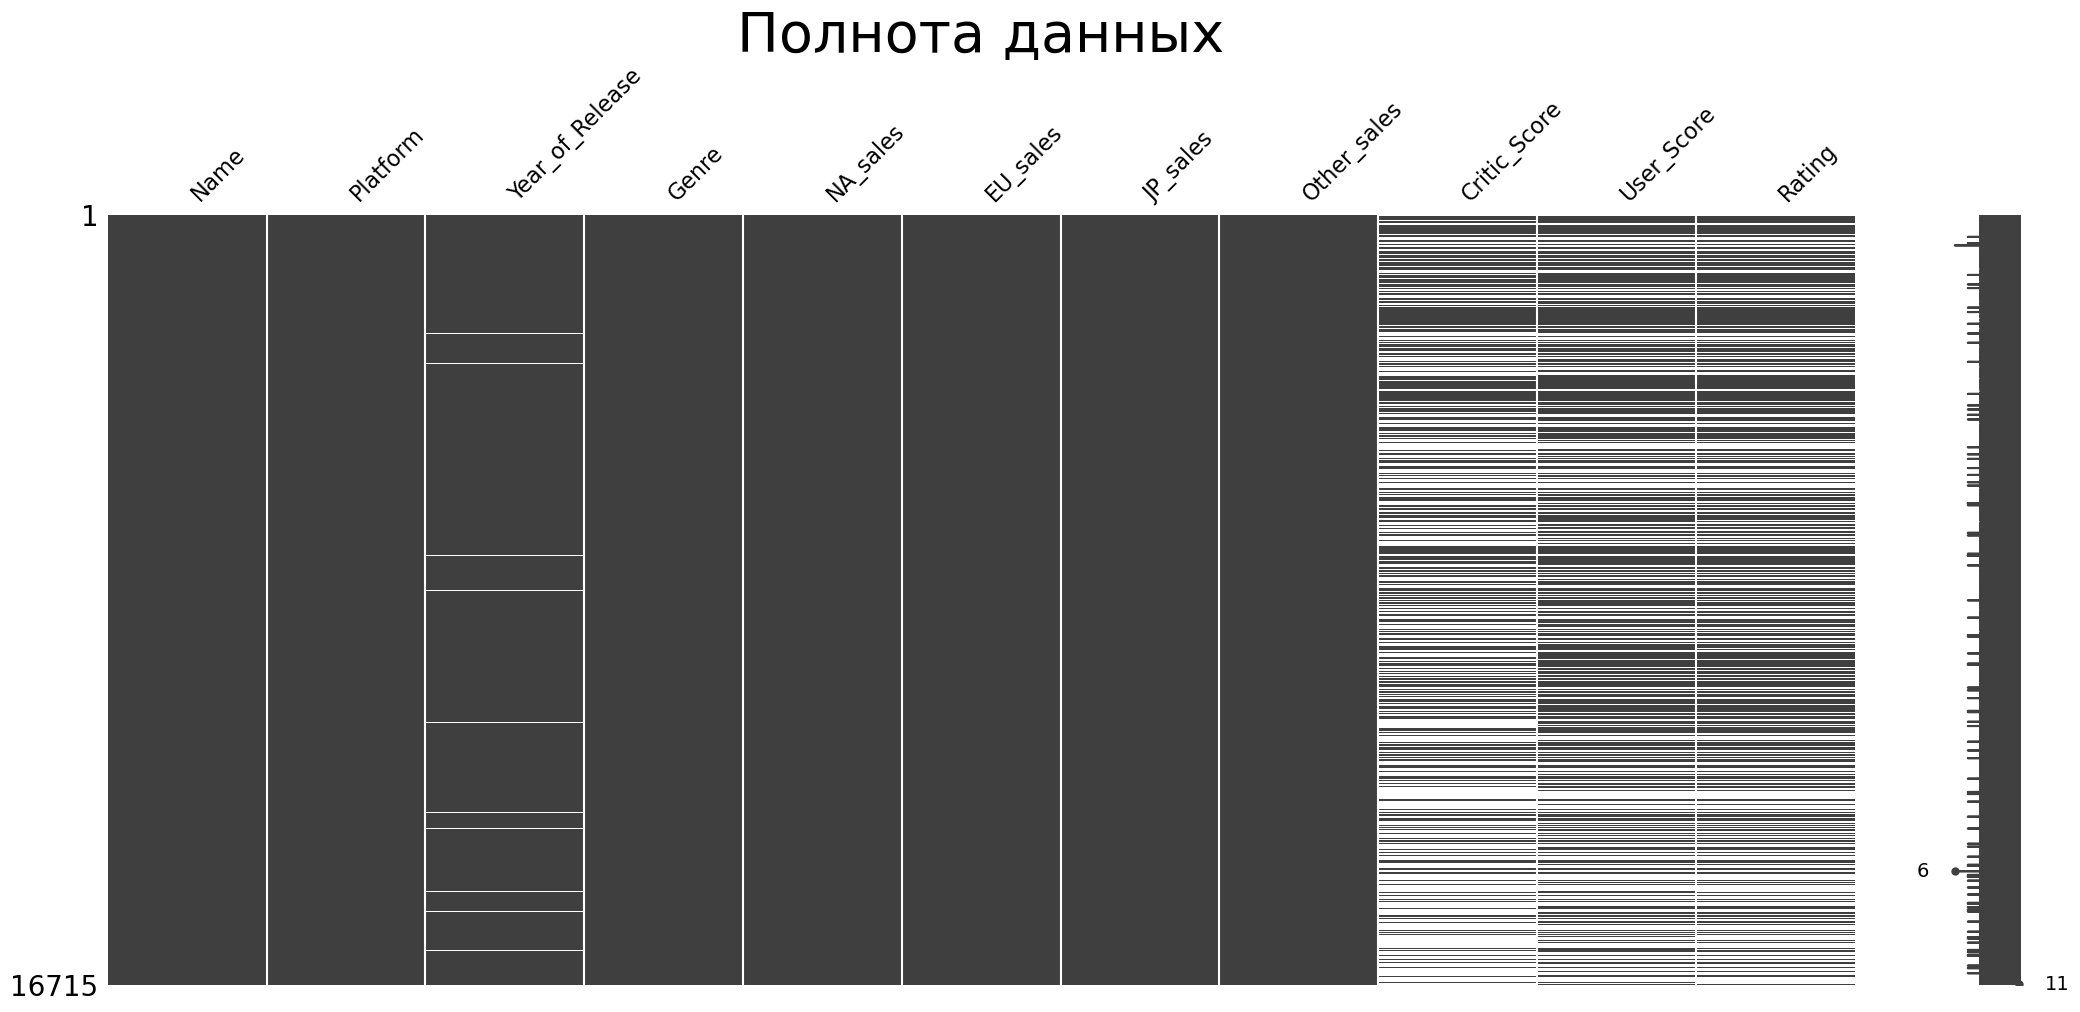

In [10]:
msno.matrix(data)
plt.title('Полнота данных', fontsize=40)
plt.show()

In [11]:
data[data.Name.isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data[data.Year_of_Release.isna()].head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Система ESRB - США, Мексика и Канада. В ESRB есть:
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет;
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Первоначально "K-A" ("Kids to Adults");
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. ;
- M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M»;

In [13]:
data.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
data.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
data.groupby('Platform').size().sort_values(ascending=False)

Platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

In [16]:
data.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [17]:
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
data.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


**Вывод:** Имеются пропуски в признаках:
- Название игры ('Name')
- Год выпуска ('Year_of_Release');
- Жанр игры ('Genre');
- Оценка критиков ('Critic_Score');
- Оценка пользователей ('User_Score');
- Рейтинг от организации ESRB ('Rating').

Больше всего пропусков в Оценке критиков (`Critic_Score`), меньше всего в Названии игры (`Name`) и Жанре игры (`Genre`). Пропуски в Названии игры (`Name`) совпадают с пропусками Жанра игры (`Genre`). Всего 2 записи, их можно удалить. С Оценкой критиков (`Critic_Score`) сложнее, тк удалить их не получиться, пропусков более 51% данных. 

Пропуски в признаке Год выпуска (`Year_of_Release`) будет сложно восстановить, тк в Названии игр (`Name`) встречается как год выпуска, так и просто нумерация части игры. Например, FIFA Soccer 2004 и Call of Duty 3. Можно также удалить эти пропуски, их менее 2 процентов от всех данных. 

Пропуски в колонках Оценка критиков (`Critic_Score`), Оценка пользователей (`User_Score`) и Рейтинг от организации ESRB (`Rating`) нужно изучить подробнее, тк они составляют значительную часть данных и удалить их не получиться. 

Восстановить данные в пропусках у Оценки критиков  и Оценки пользователей не получиться, тк они зависят от платформы и даты выпуска. Одна и та же игра может быть перезапуском старой версии, соответственно, и оценка, и продажи (и даже рейтинг) у нее могут быть другие. 

В Оценке пользователей (`User_Score`) модой является значение **tbd** (TBD (to be determined = будет определено), прим. гугл). Стоит заменить на NaN, чтобы перевести в float. 

В признаке Рейтинг от организации ESRB (`Rating`) 'K-A' надо заменить на 'E', тк это старая маркировка, означает одно и то же. Пропуски заполню заглушкой 'unknown'. 

Платформы, у которых менее 100 строк, надо объединить в одну.

Стоит поменять тип данных в столбцах Год релиза (`Year_of_Release`) на целочисленное значение, Оценка пользователей (`User_Score`) на вещественное число.

Надо поменять название столбцов.

Добавлю столбец с общими продажами по всему миру.

## Подготовка данных

In [19]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [20]:
data.columns = data.columns.str.lower()

In [21]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [22]:
data.dropna(subset=['name', 'year_of_release'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [24]:
data['rating'].fillna('unknown', inplace=True)
data.loc[data.rating == 'K-A', 'rating'] = 'E'

In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [26]:
data['user_score'] = data['user_score'].astype('float')

In [27]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [28]:
# общие продажи по всему миру
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
# фильтр платформ, у которых менее 100 строк
filter_platform = data.groupby('platform').size().sort_values(ascending=False)
filter_platform = filter_platform[filter_platform < 100]
filter_platform.index

Index(['NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'PCFX',
       'GG'],
      dtype='object', name='platform')

In [30]:
data.loc[data.platform.isin(filter_platform.index), 'platform'] = 'Other'

In [31]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,Other,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,Other,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [32]:
data.year_of_release.value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

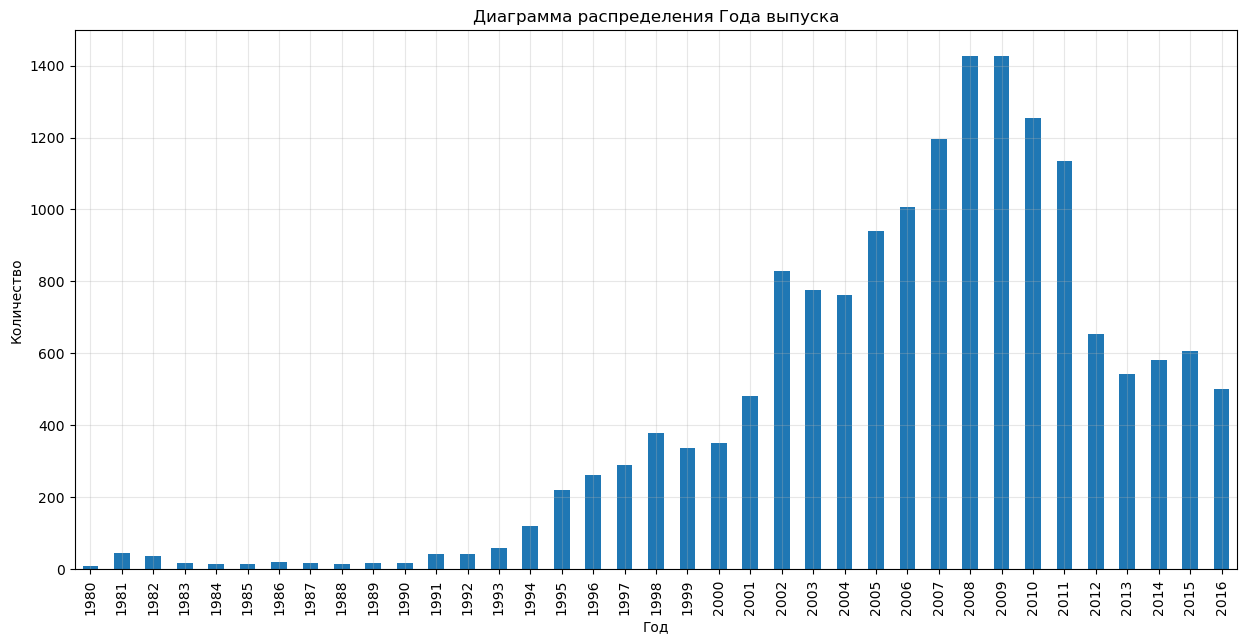

In [33]:
data.year_of_release.value_counts().sort_index().plot(x='name', kind='bar', figsize=(15,7))
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Диаграмма распределения Года выпуска')
plt.show()

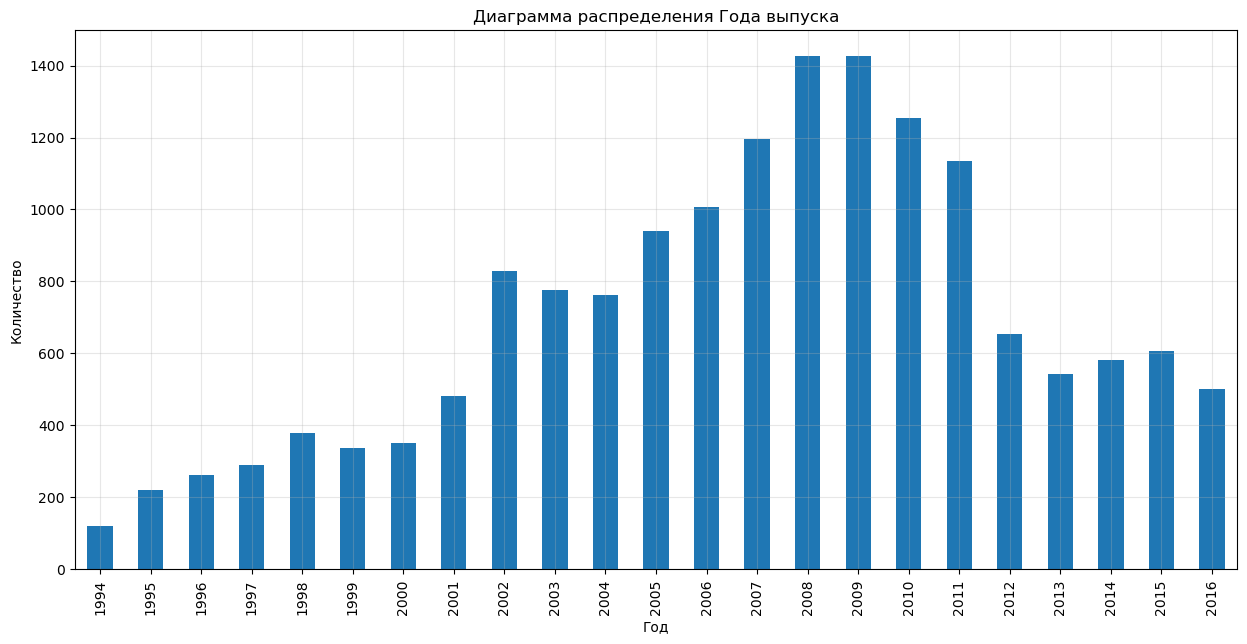

In [34]:
data[data['year_of_release'] >= 1994]['year_of_release'].value_counts().sort_index().plot(x='name', kind='bar', figsize=(15,7))
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Диаграмма распределения Года выпуска')
plt.show()

In [35]:
data = data.query('year_of_release >= 1994')

**Вывод:** С 94 года понемногу начало расти количество выпущенных игр, в 2002 году был скачок, мода 2008 год, в 2012 году наблюдается резкое сокращение релизов. Данные можно ограничить с 1994 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [36]:
data.groupby('platform')['sum_sales'].sum().sort_values()

platform
SAT        33.59
PSV        53.81
WiiU       82.19
SNES       84.67
XOne      159.32
Other     179.57
GC        196.73
N64       218.01
XB        251.57
PC        252.66
3DS       257.81
PSP       289.53
GBA       312.88
PS4       314.14
PS        727.58
DS        802.76
Wii       891.18
PS3       931.34
X360      961.24
PS2      1233.56
Name: sum_sales, dtype: float64

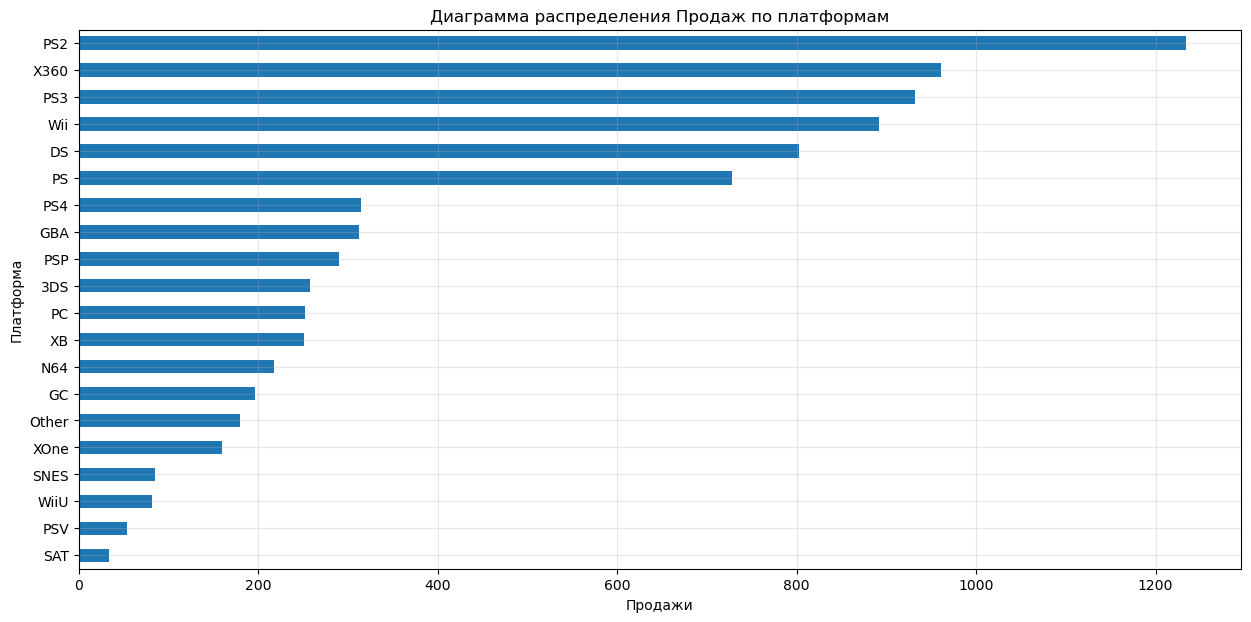

In [37]:
data.groupby('platform')['sum_sales'].sum().sort_values().plot(y='name', kind='barh', figsize=(15,7))
plt.xlabel('Продажи')
plt.ylabel('Платформа')
plt.title('Диаграмма распределения Продаж по платформам')
plt.show()

Топ 5 популярных - PS2, X360, PS3, Wii, DS.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16079 non-null  object 
 1   platform         16079 non-null  object 
 2   year_of_release  16079 non-null  int32  
 3   genre            16079 non-null  object 
 4   na_sales         16079 non-null  float64
 5   eu_sales         16079 non-null  float64
 6   jp_sales         16079 non-null  float64
 7   other_sales      16079 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16079 non-null  object 
 11  sum_sales        16079 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


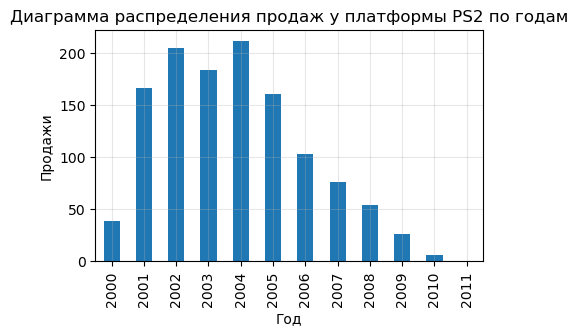

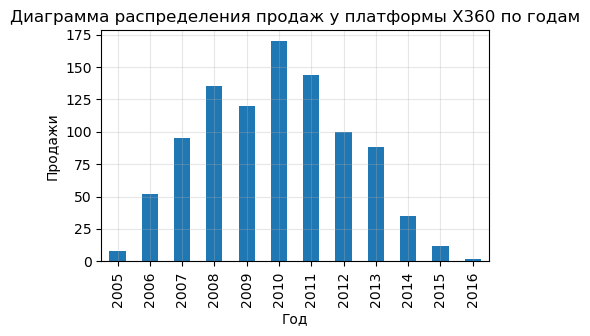

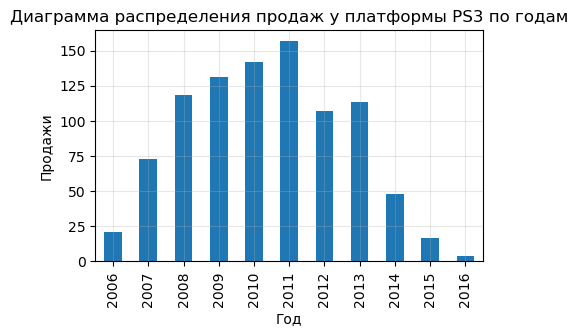

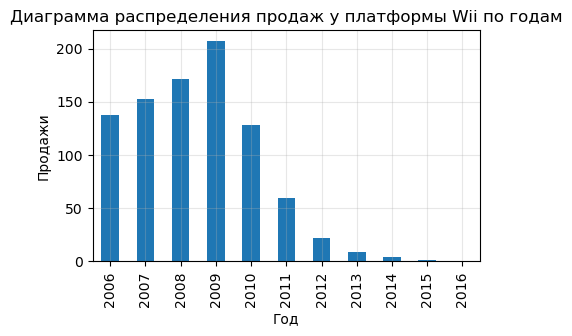

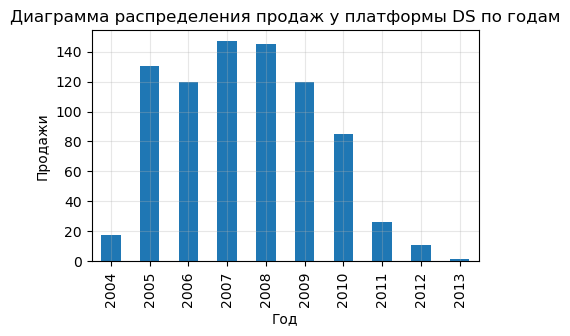

In [39]:
for i in ['PS2', 'X360', 'PS3', 'Wii', 'DS']:
    (
        data
        .query('platform == @i and year_of_release >= 1994')
        .groupby('year_of_release')['sum_sales']
        .sum()
        .plot(y='name', kind='bar', figsize=(5,3), title=f'Диаграмма распределения продаж у платформы {i} по годам')
    )
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.show()

**Вывод:** Каждая платформа живет примерно 11 лет:
- `PS2` с 1998 по 2011 - 13 лет;
- `X360` с 2005 по 2016 - 12 лет
- `PS3` с 2005 по 2016 - 12 лет;
- `Wii`с 2006 по 2016 - 11 лет;
- `DS` с 2004 по 2013 - 10 лет.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Определю какие платформы актуальны на данный момент

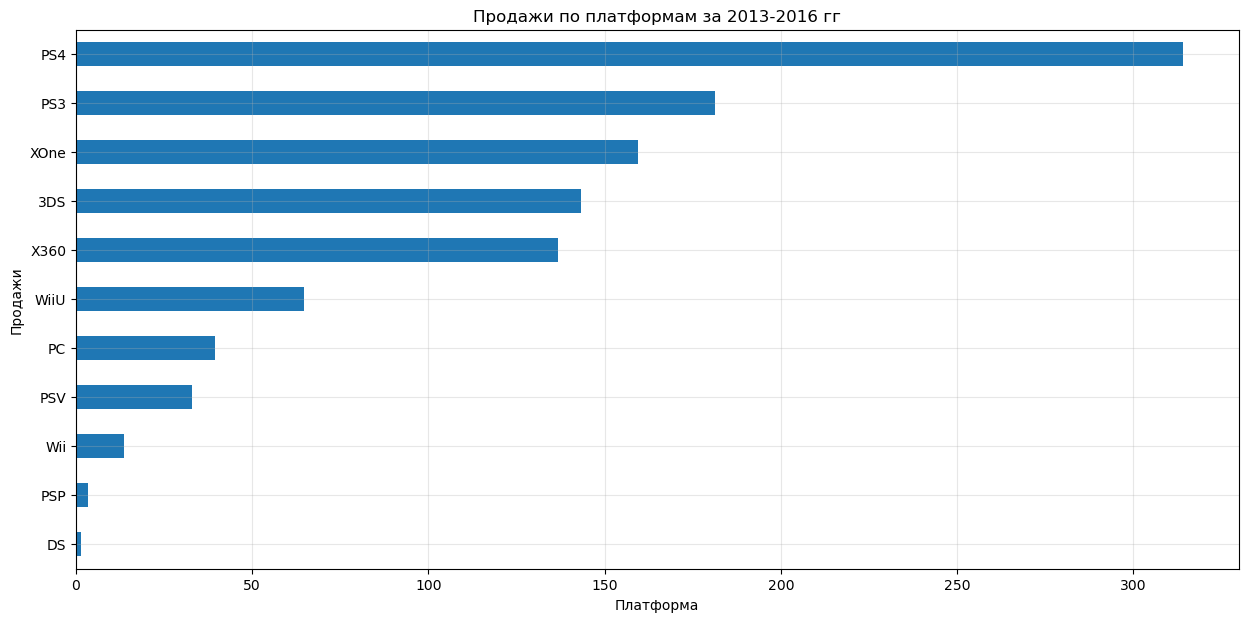

In [40]:
data.query('2013 <= year_of_release').groupby('platform')['sum_sales'].sum().sort_values().plot(y='name', kind='barh', figsize=(15,7))
plt.title('Продажи по платформам за 2013-2016 гг')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Возьму 5 самых популярных платформ (PS4, PS3, XOne, 3DS, X360) и построю график по годам. Ограничу 2013 и 2015 годом, тк данные за 2016 год неполные и могут ввести в заблуждение.

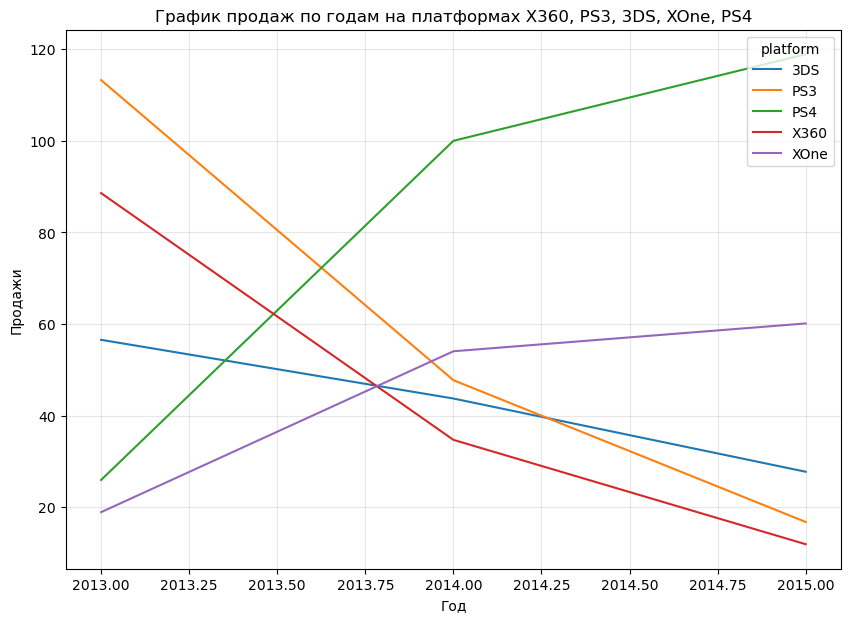

In [41]:
data.query('2013 <= year_of_release < 2016 and platform in ["X360", "PS3", "3DS", "XOne", "PS4"]').pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(10, 7))
plt.title('График продаж по годам на платформах X360, PS3, 3DS, XOne, PS4')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**Вывод:** 
С 2014 года положительная тенденция была только у двух платформ - PS4, XOne. У остальных платформ с каждым годом продажи падают. То есть актуальными являются на момент 2016 года только две платформы - PS4, XOne. С PC непонятки, тк что тогда, что сейчас, в Интернете конфликты, что лучше для игр - ПК, PS4/PS5 или XOne/Xbox Series.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

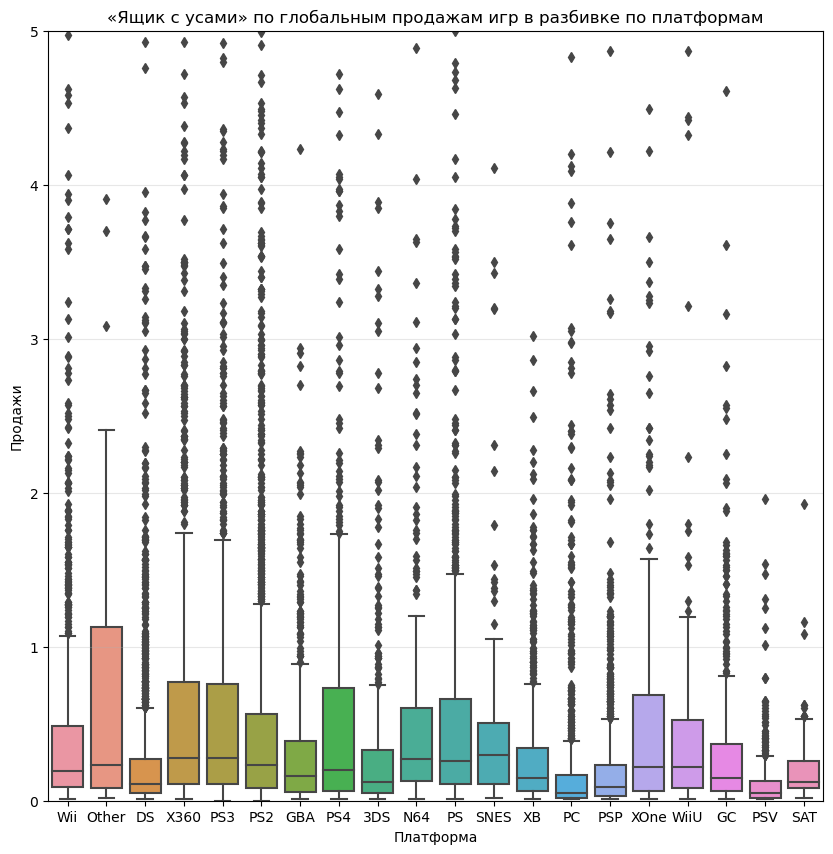

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=data, x='platform', y='sum_sales', ax=ax)
plt.ylim(0, 5)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

In [43]:
data.query('platform == "PS4" and sum_sales > 2')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


In [44]:
data.query('platform == "XOne"')['sum_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

In [45]:
data.query('platform == "PS4"')['sum_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

**Вывод:** У всех платформ есть выбросы, но их удалять не нужно, это бестселлеры. Наиболее стабильные платформы с хорошим доходом - PS4, PS3, PS2, XOne, X360, PS. Но учитывая актуальность платформ, то остается только PS4 и XOne.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

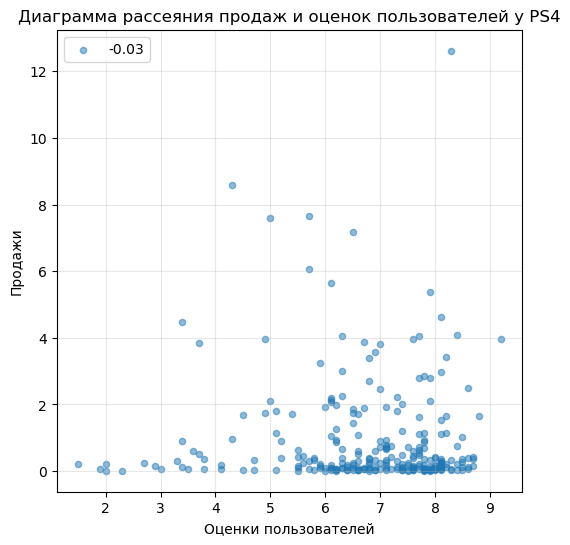

In [46]:
data.query('platform == "PS4"').plot(
    x='user_score', 
    y='sum_sales', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(6, 6),
    label=round(data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['sum_sales']),2)
)
plt.title('Диаграмма рассеяния продаж и оценок пользователей у PS4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

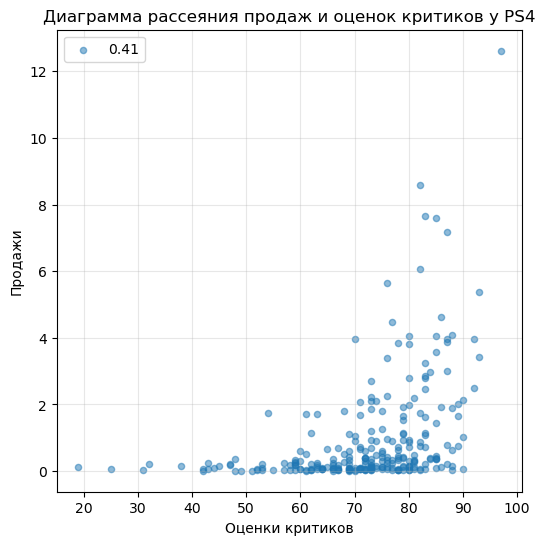

In [47]:
data.query('platform == "PS4"').plot(
    x='critic_score', 
    y='sum_sales', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(6, 6),
    label=round(data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['sum_sales']),2)
)
plt.title('Диаграмма рассеяния продаж и оценок критиков у PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

**Вывод:** Была взята платформа PS4. 

Линейная корреляция между общими продажами и оценкой пользователей очень слабая, больше нейтральная, то есть у них нет явной взаимосвязи. 

Между оценкой критиков и продажами, если смотреть по шкале Чеддока, средняя положительная корреляция. То есть между ними прослеживается некакая взаимосвязь - больше продаж - больше оценка.

![Шкала Чеддока](https://intuit.ru/EDI/22_08_23_1/1692656410-28489/tutorial/25/objects/8/files/8_1.gif)

### Соотнесите выводы с продажами игр на других платформах.

Самые 5 популярных платформ за все время - PS2, DS, PS3, Wii, X360.

In [48]:
top_5_platform = data.groupby('platform')['name'].count().sort_values(ascending=False).iloc[:5].index
top_5_platform

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360'], dtype='object', name='platform')

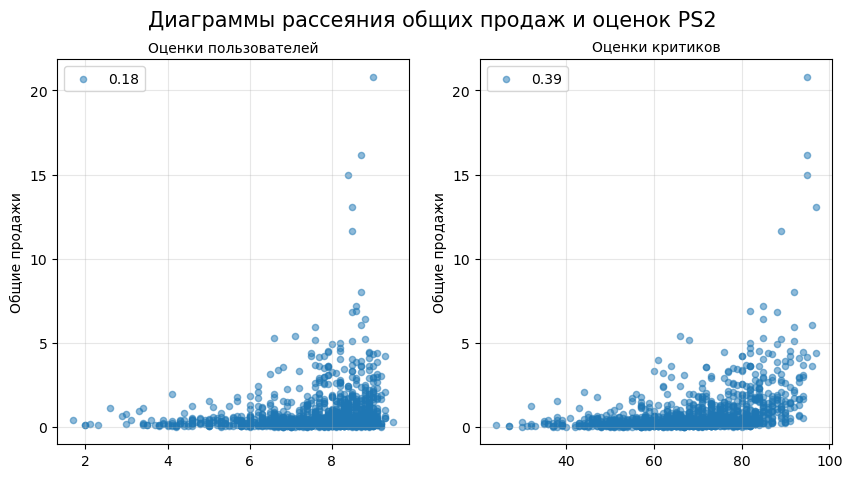

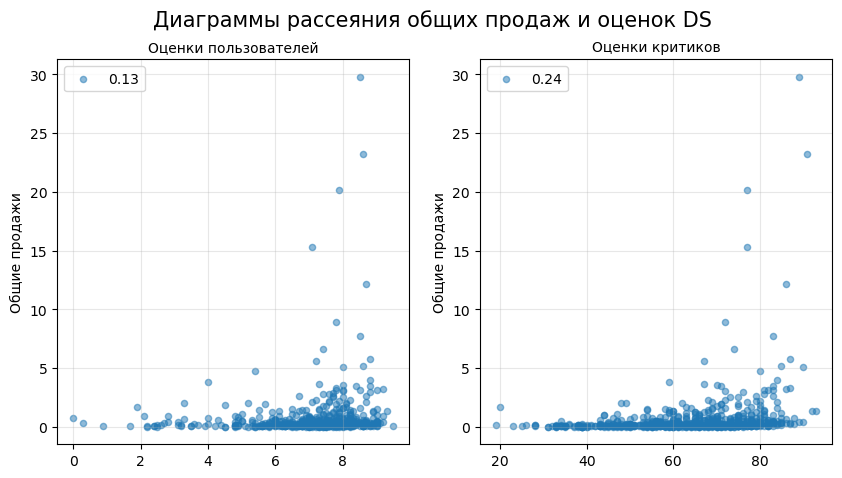

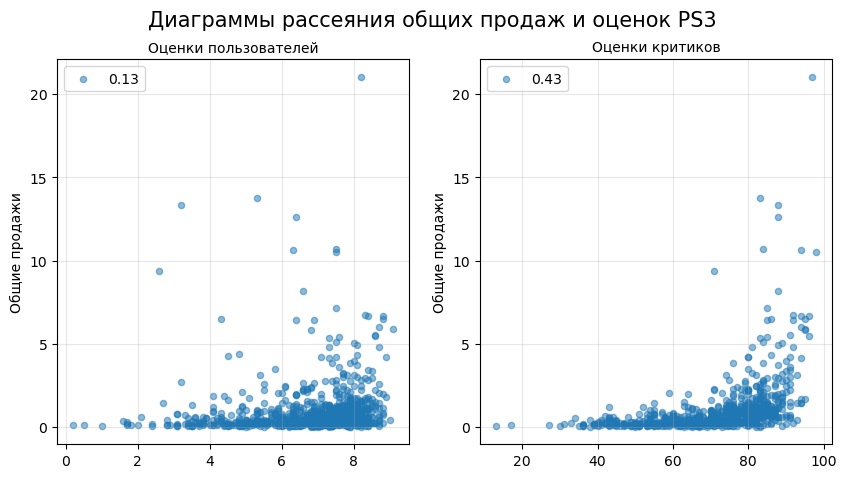

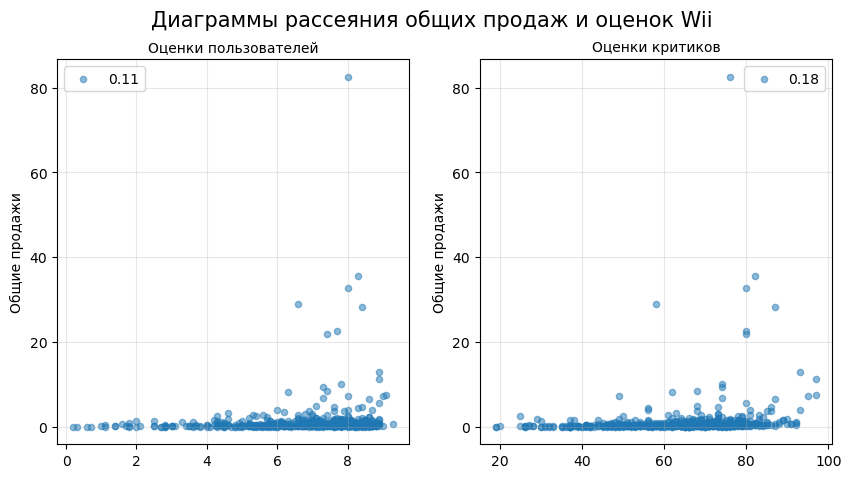

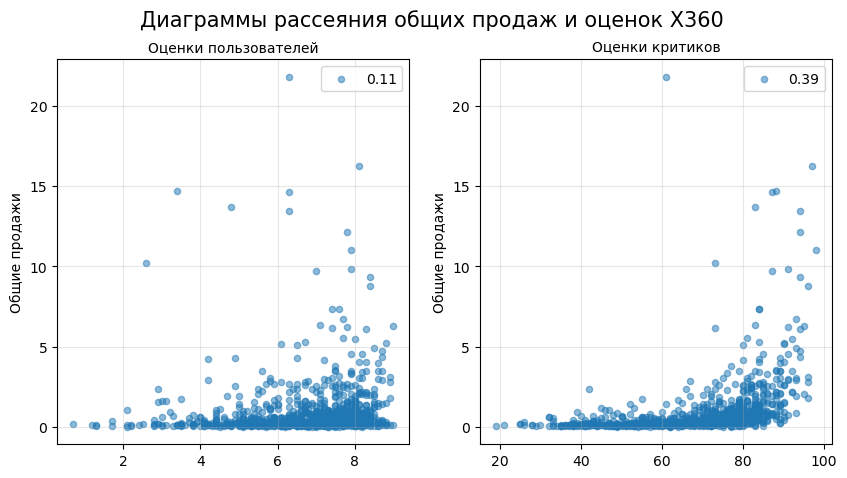

In [49]:
# цикл с графиками корреляции общих продаж с оценкой пользователя/критиков для топ 5 платформ за все время
for i in range(5):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    platform = top_5_platform[i]
    for _ in range(2):
        corr_user_sale = data.query('platform == @platform')['user_score'].corr(data.query('platform == @platform')['sum_sales'])
        data.query('platform == @platform').plot(
            x='user_score',
            y='sum_sales',
            kind='scatter',
            alpha=0.5,
            ax=axes[0],
            label=round(corr_user_sale,2)
        )
        axes[0].set_ylabel('Общие продажи')
        axes[0].set_xlabel('')
        axes[0].set_title(f'Оценки пользователей', fontsize=10)
        
        
        corr_critic_sale = data.query('platform == @platform')['critic_score'].corr(data.query('platform == @platform')['sum_sales'])
        data.query('platform == @platform').plot(
            x='critic_score', 
            y='sum_sales', 
            kind='scatter', 
            alpha=0.5,
            ax=axes[1],
            label=round(corr_critic_sale,2)
        )
        axes[1].set_ylabel('Общие продажи')
        axes[1].set_xlabel('')
        axes[1].set_title(f'Оценки критиков', fontsize=10)
        fig.suptitle(f'Диаграммы рассеяния общих продаж и оценок {platform}', fontsize=15)
        plt.show()

**Вывод:** У PS2, PS3 и X360 взаимосвязь общих продаж и оценок критиков совпадает с PS4 - больше оценка - больше продаж. Но корреляция оценок пользователей и общих продаж слабо выражена, но присутствует - она слабая положительная, то есть чем больше оценка, тем больше продаж по всему миру.

У DS и Wii слабая положительная у общих продаж как с оценкой пользователей, так и с оценкой критиков.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [50]:
pt = data.pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'count', 'mean', 'median'])
pt.columns = ['sum', 'count', 'mean', 'median']
pt = pt.sort_values(by=['median', 'mean'], ascending=False)

In [51]:
pt

,sum,count,mean,median
genre,,,,
Platform,640.59,819,0.782161,0.24
Shooter,976.24,1258,0.776025,0.23
Sports,1266.74,2260,0.560504,0.22
Fighting,411.05,814,0.504975,0.20
Racing,694.59,1211,0.573567,0.18
Action,1646.62,3226,0.510422,0.18
Role-Playing,895.60,1451,0.617229,0.18
Misc,776.53,1707,0.454909,0.16
Simulation,381.84,849,0.449753,0.15


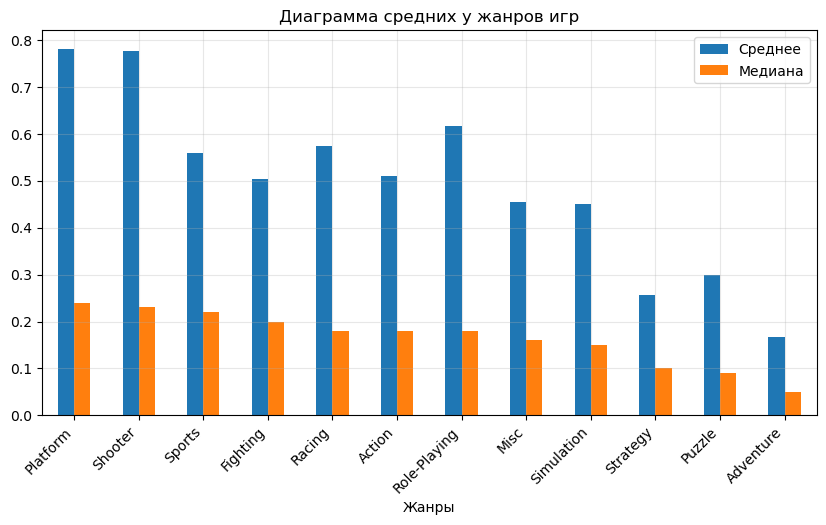

In [52]:
pt.loc[:, ['mean', 'median']].plot(kind='bar', figsize=(10, 5))
plt.title('Диаграмма средних у жанров игр')
plt.legend(['Среднее', 'Медиана'])
plt.xlabel('Жанры')
plt.xticks(rotation=45, ha='right')
plt.show()

**Вывод:** Самый прибыльныe жанры Platform, Shooter и Sports, судя  по высокому среднему, в этих жанрах есть игры с аномальным доходом - бестселлеры, но и самая большая медиана, то есть даже игры, которые "не хватают звезд с неба", получают хорошую прибыль. Самый невыгодные оказались - Strategy и Adventure.

## Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [53]:
regions = {'na_sales': 'Северная Америка (NA)', 'eu_sales': 'Европа (EU)', 'jp_sales': 'Япония (JP)'}

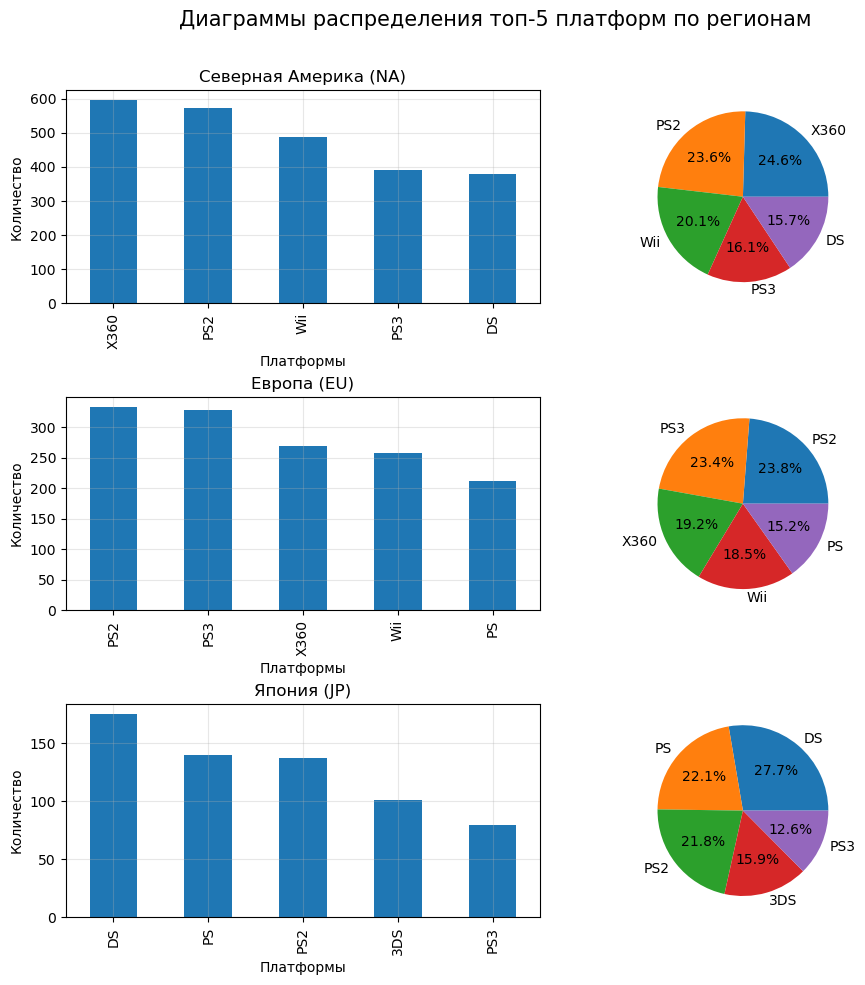

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i in range(3):
    region = list(regions.keys())[i]
    df = data.pivot_table(
        index='platform', 
        values=region,
        aggfunc='sum') \
    .sort_values(by=region, ascending=False) \
    .head()
        
        
    df.plot(kind='bar', ax=axes[i, 0], legend=None)

        
    axes[i, 0].set_title(f'{regions[region]}')
    axes[i, 0].set_xlabel('Платформы')
    axes[i, 0].set_ylabel('Количество')
        
    df.plot(ax=axes[i, 1], kind='pie', subplots=True, legend=None, autopct='%1.1f%%')
    axes[i, 1].set_ylabel('')
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Диаграммы распределения топ-5 платформ по регионам', fontsize=15)
plt.show()

In [55]:
data.pivot_table(
        index='platform', 
        values='jp_sales',
        aggfunc='sum') \
    .sort_values(by=region, ascending=False)

,jp_sales
platform,
DS,175.00
PS,139.78
PS2,137.54
3DS,100.62
PS3,79.41
PSP,75.88
Other,69.29
Wii,68.28
SNES,59.53


**Вывод:** 

В Северной Америка топ-5 платформ:
- X360 (24.6% среди топ-5);
- PS2 (23.6%);
- Wii (20.1%);
- PS3 (16.1%);
- DS (15.7%).

В Европе:
- PS2 (23.8%);
- PS3 (23.4%);
- X360 (19.2%);
- Wii (18.5%);
- PS (15.2%).

В Японии:
- Other (25.9%);
- DS (22.8%);
- PS (18.2%);
- PS2 (17.9%);
- SNES (15.2%).

В Северной Америке, Европе и Японии любят одну и ту же платформу - PS2. Северную Америку и Европу объединяет - X360, PS2, PS3 и Wii. В Японии много покупают малоизвестные платформы.

### Самые популярные жанры (топ-5). Поясните разницу.

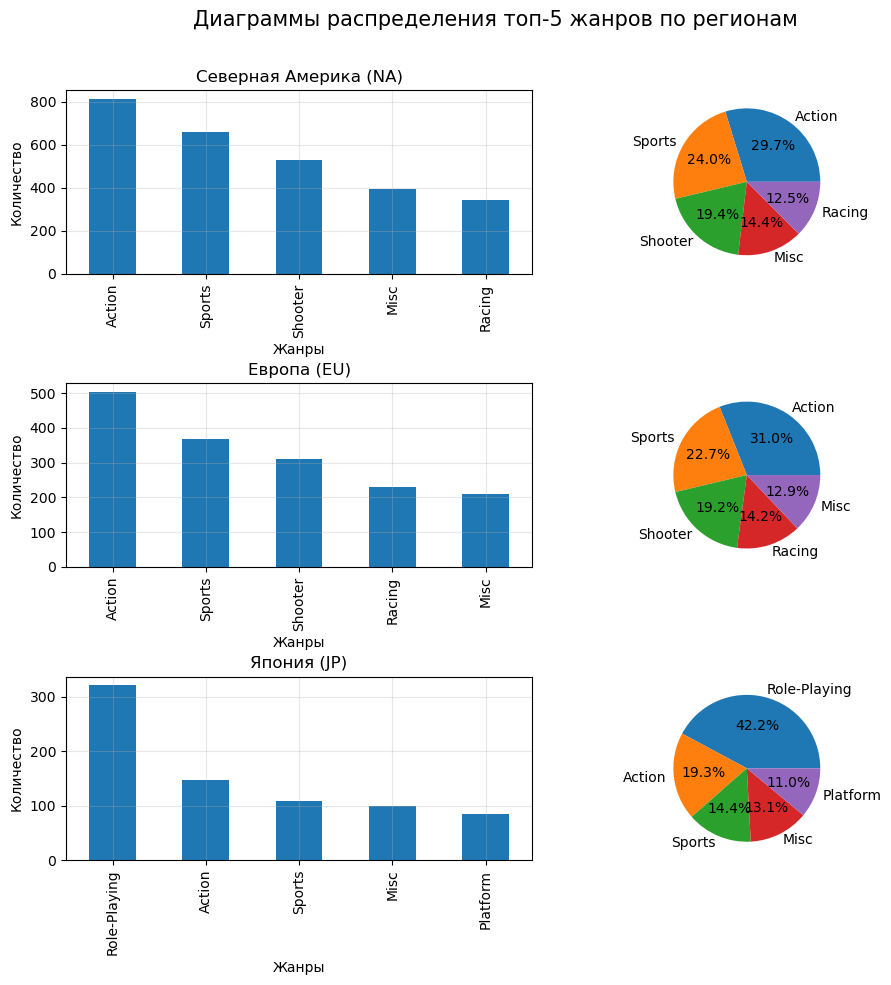

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i in range(3):
    region = list(regions.keys())[i]
    df = data.pivot_table(
        index='genre', 
        values=region,
        aggfunc='sum') \
    .sort_values(by=region, ascending=False) \
    .head()
        
        
    df.plot(kind='bar', ax=axes[i, 0], legend=None)

        
    axes[i, 0].set_title(f'{regions[region]}')
    axes[i, 0].set_xlabel('Жанры')
    axes[i, 0].set_ylabel('Количество')
        
    df.plot(ax=axes[i, 1], kind='pie', subplots=True, legend=None, autopct='%1.1f%%')
    axes[i, 1].set_ylabel('')
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Диаграммы распределения топ-5 жанров по регионам', fontsize=15)
plt.show()

**Вывод:** 

В Северной Америке топ-5 жанров:
- Action (29.1% от топ-5);
- Sports (22.7%);
- Shooter (19.7%);
- Platform (15%);
- Misc (13.5)%.

В Европе:
- Action (31.1%);
- Sports (22.6%);
- Shooter (19.2%);
- Racing (14.3%);
- Misc (12.8%).

В Японии:
- Role-Playing (39.9%);
- Action (18.1%);
- Sports (15.2%);
- Platform (14.7%);
- Misc (12.1%).


В Европе и Северной Америке самые популярные 3 жанра одни и те же - Action, Sports и Shooter. 

В Японии ожидаемый топ-1 в Role-Playing, у них есть даже свой отдельный жанр - JRPG.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

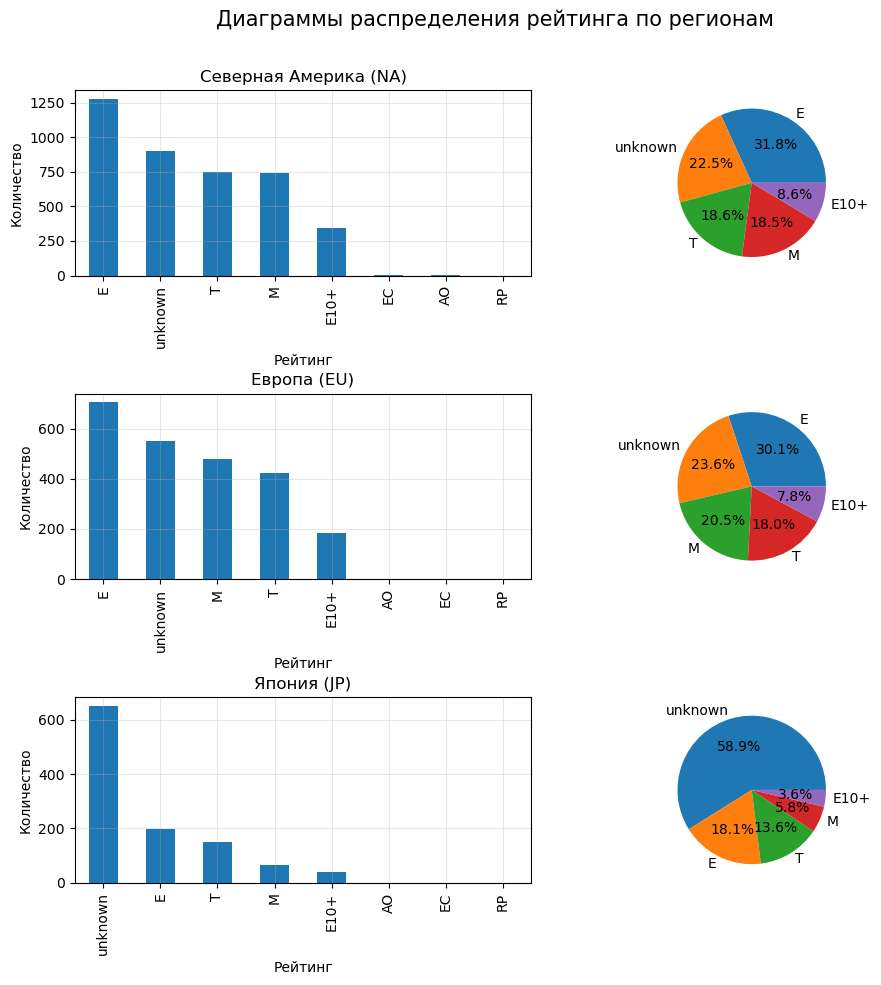

In [57]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i in range(3):
    region = list(regions.keys())[i]
    df = data.pivot_table(
        index='rating', 
        values=region,
        aggfunc='sum') \
    .sort_values(by=region, ascending=False)
        
        
    df.plot(kind='bar', ax=axes[i, 0], legend=None)

        
    axes[i, 0].set_title(f'{regions[region]}')
    axes[i, 0].set_xlabel('Рейтинг')
    axes[i, 0].set_ylabel('Количество')
        
    df.iloc[:5].plot(ax=axes[i, 1], kind='pie', subplots=True, legend=None, autopct='%1.1f%%')
    axes[i, 1].set_ylabel('')
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Диаграммы распределения рейтинга по регионам', fontsize=15)
plt.show()

**Вывод:** 

В Северной Америке топ-5 рейтинга:
- E (29.4%);
- Неизвестно (28.3%);
- T (17.2%);
- M (17.1%);
- E10+ (8%).

В Европе:
- E (29.4%);
- Неизвестно (25.4%);
- M (20%);
- T (17.6%);
- E10+ (7.6%).

В Японии:
- Неизвестно (64.8%);
- E (15.5%);
- T (11.7%);
- M (4.9%);
- E10+ (3.1%).

В Японии странная картина получается - у большей части игр нет рейтинга. ESRB опеределяет американской ассоциацией Entertainment Software Association, а большинство японских игр специфичны и остаются они только на рынке Японии.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Это двухсторонняя гипотеза. Порог поставлю в 5%.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Альтернативая - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [58]:
alpha = 0.05
pc = data.query('platform == "PC"')['user_score'].dropna()
xone = data.query('platform == "XOne"')['user_score'].dropna()
results = st.ttest_ind(pc, xone, equal_var=False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.442937492775816e-06
Отвергаем нулевую гипотезу


**Вывод:** Тк нулевая гипотеза отвергается, то, скорее всего, средние пользовательские рейтинги платформ Xbox One и PC разные.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Это снова двухсторонняя гипотеза. Порог снова оставлю в 5%.

Нулевая - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Альтернативная - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [59]:
action = data.query('genre == "Action"')['user_score'].dropna()
sports = data.query('genre == "Sports"')['user_score'].dropna()
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу. Скорее всего, cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Общий вывод

Имеются пропуски в признаках:
- Название игры ('Name')
- Год выпуска ('Year_of_Release');
- Жанр игры ('Genre');
- Оценка критиков ('Critic_Score');
- Оценка пользователей ('User_Score');
- Рейтинг от организации ESRB ('Rating').

Больше всего пропусков в Оценке критиков (`Critic_Score`), меньше всего в Названии игры (`Name`) и Жанре игры (`Genre`). Пропуски в Названии игры (`Name`) совпадали с пропусками Жанра игры (`Genre`). Всего 2 записи, их удалила. С Оценкой критиков (`Critic_Score`) сложнее, тк удалить эти записи не получиться, пропусков более 51% данных. 

Пропуски в признаке Год выпуска (`Year_of_Release`) было сложно восстановить, тк в Названии игр (`Name`) встречается как год выпуска, так и просто нумерация части игры. Например, FIFA Soccer 2004 и Call of Duty 3. Удалила эти строки.

В Оценке пользователей (`User_Score`) модой является значение **tbd** (TBD (to be determined = будет определено), прим. гугл). Заменила на NaN. 

В признаке Рейтинг от организации ESRB (`Rating`) 'K-A' был заменен на  'E', тк это старая маркировка, означает одно и то же. Пропуски заполнила заглушкой 'unknown'. 

Платформы, у которых менее 100 игр, объединила в одну.

Поменяла тип данных в признаках Год релиза (`Year_of_Release`) на целочисленное значение и Оценка пользователей (`User_Score`) на вещественное число.

Добавила признак с общими продажами по всему миру.

С 94 года понемногу начало расти количество выпущенных игр, в 2002 году был скачок, мода 2008 год, в 2012 году наблюдается резкое сокращение релизов. Данные можно ограничить с 1994 года.

Платформа в среднем живет 11 лет.

С 2014 года положительная тенденция была только у двух платформ - PS4, XOne. У остальных платформ с каждым годом продажи падают. То есть актуальными являются на момент 2016 года только две платформы - PS4, XOne. С PC непонятки, тк что тогда, что сейчас, в Интернете конфликты, что лучше для игр - ПК, PS4/PS5 или XOne/Xbox Series.

У всех платформ есть выбросы, но их удалять не нужно, это бестселлеры. Наиболее стабильные платформы с хорошим доходом - PS4, PS3, PS2, XOne, X360, PS. Но учитывая актуальность платформ, то остается только PS4 и XOne.

У PS2, PS3 и X360 взаимосвязь общих продаж и оценок критиков совпадает с PS4 - больше оценка - больше продаж. Но корреляция оценок пользователей и общих продаж слабо выражена, но присутствует - она слабая положительная, то есть чем больше оценка, тем больше продаж по всему миру.

У DS и Wii слабая положительная у общих продаж как с оценкой пользователей, так и с оценкой критиков.

Самый прибыльныe жанры Platform, Shooter и Sports, судя  по высокому среднему, в этих жанрах есть игры с аномальным доходом - бестселлеры, но и самая большая медиана, то есть даже игры, которые "не хватают звезд с неба", получают хорошую прибыль. Самый невыгодные оказались - Strategy и Adventure.

В Северной Америка топ-5 платформ:
- X360 (24.6% среди топ-5);
- PS2 (23.6%);
- Wii (20.1%);
- PS3 (16.1%);
- DS (15.7%).

В Европе:
- PS2 (23.8%);
- PS3 (23.4%);
- X360 (19.2%);
- Wii (18.5%);
- PS (15.2%).

В Японии:
- Other (25.9%);
- DS (22.8%);
- PS (18.2%);
- PS2 (17.9%);
- SNES (15.2%).

В Северной Америке, Европе и Японии любят одну и ту же платформу - PS2. Северную Америку и Европу объединяет - X360, PS2, PS3 и Wii. В Японии много покупают малоизвестные платформы.


В Северной Америке топ-5 жанров:
- Action (29.1% от топ-5);
- Sports (22.7%);
- Shooter (19.7%);
- Platform (15%);
- Misc (13.5)%.

В Европе:
- Action (31.1%);
- Sports (22.6%);
- Shooter (19.2%);
- Racing (14.3%);
- Misc (12.8%).

В Японии:
- Role-Playing (39.9%);
- Action (18.1%);
- Sports (15.2%);
- Platform (14.7%);
- Misc (12.1%).


В Европе и Северной Америке самые популярные 3 жанра одни и те же - Action, Sports и Shooter. 

В Японии ожидаемый топ-1 в Role-Playing, у них есть даже свой отдельный жанр - JRPG.

В Северной Америке топ-5 рейтинга:
- E (29.4%);
- Неизвестно (28.3%);
- T (17.2%);
- M (17.1%);
- E10+ (8%).

В Европе:
- E (29.4%);
- Неизвестно (25.4%);
- M (20%);
- T (17.6%);
- E10+ (7.6%).

В Японии:
- Неизвестно (64.8%);
- E (15.5%);
- T (11.7%);
- M (4.9%);
- E10+ (3.1%).

В Японии странная картина получается - у большей части игр нет рейтинга. ESRB опеределяет американской ассоциацией Entertainment Software Association, а большинство японских игр специфичны и остаются они только на рынке Японии.

Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" отверглась, автоматически подтвердилась альтернативная - "Средние пользовательские рейтинги платформ Xbox One и PC разные".

Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" не отвергается.

По итогу, для разработки игр лучше брать актуальную платформу, которой около 5 или меньше лет, с учетом разработки и того, что платформа живет в среднем 11 лет. Это либо PS4, либо XOne (если делать прогноз на 2017 год), либо PC (имхо, актуальная платформа эвер). В наиболее популярных жанрах - Action, Sports, Shooter. С рейтингом E.